In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import time
import datetime

%matplotlib inline

In [6]:
def generate_data(fct, x_start, x_end, num_of_samples, noise=0.0):
    """
    generate sequences to feed to rnn for fct(x)
    """
    x = np.linspace(x_start, x_end, num_of_samples, dtype=np.float32)
    
    rand_arr = np.random.uniform(1-NOISE, 1+NOISE, size=len(x))
    data = fct(x) * rand_arr
    return x, data

In [7]:
def generate_timeseries(data):
    """
    associate a timestamp to a series of data
    """
    base_timestamp = datetime.datetime.now()

    df = pd.DataFrame(
        {'value': data}, 
            index = pd.date_range(base_timestamp-datetime.timedelta(1), periods=len(Y), freq='S'),
            columns=['value'])

    df.index.name = 'timestamp'   
    return df

In [8]:
NUM_SAMPLES = 5400
NOISE = 0.4

fx = lambda x: 100 * np.power(math.e, -x/25)
fx1 = lambda x: np.sin(0.4*x)+1
fx2 = lambda x: 10*x -3*np.power(x,3)+1/2*np.power(x,5)*np.sin(0.4*x)-np.tanh(np.power(math.e, -x/2))+100

X, Y = generate_data(fx1, 0, 100, NUM_SAMPLES, NOISE)
sample_workrate = np.vstack((X, Y)).T

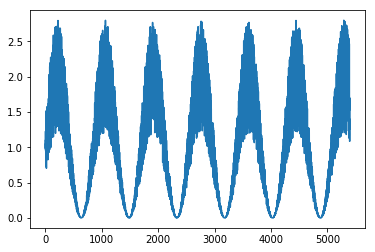

In [9]:
plt.plot(sample_workrate[:,1])

In [11]:
df = generate_timeseries(Y)
df.to_csv('sampledata_data_values.csv')